## Introdução

Esse jupyter notebook foi desenvolvido para introduzir e abordar com razoável profundidade os principais conceitos e fórmulas por trás de tarefas de classificação em Machine Learning baseadas em classificadores lineares. Esse primeiro notebook da série serve também para introduzir os conceitos necessários para a compreensão posteriora dos próximos notebooks desta série, que vão de desde a introdução de classificadores lineares (este primeiro), seguindo para classificadores lineares simples como Perceptron, Regressão logística e Linear Support Vector Classifier e depois expandindo para modelos mais complexos e não lineares com foco em redes neurais e o algoritmo de backpropagation. O algoritmo de Gradient Descent e suas variações também serão abordados em maior profundidade a partir do terceiro notebook da série.


## Sumário
    
- 1.Aprendizagem Supervisionada
    
    - 1.1 Feature Space
    - 1.2 Vetorização
    - 1.3 Tarefas de Classificação
    - 1.4 Classificação binária
    - 1.5 Classificação multi-classes
        - 1.5.1 One vs Rest (OvR)
        - 1.5.2 One vs One (OvO)
    
    
    
- 2.Classificadores Lineares
    
    - 2.1 Modelos paramétricos
    - 2.2 Coeficiente Linear ou bias
    - 2.3 Classe positiva e negativa
    - 2.4 Superfícies de decisão
    - 2.5 Thresholding Function
    
    
- 3.Hiperplano de Separação

    - 3.1 Vetor normal
        - 3.1.1 Ângulo $\theta$ entre vetores
        - 3.1.2 Norma de um vetor
        - 3.1.3 L1-Norm
        - 3.1.4 L2-Norm
        - 3.1.5 Medidas de distância vetorial
        <br><br>
    - 3.2 Equação do Hiperplano 
        - 3.2.1 Visualizando o Hiperplano em $\mathbb{R}^2$
        - 3.2.2 Visualizando o Hiperplano em $\mathbb{R}^3$
        <br><br>
    - 3.3 Generalizando a equação para $\mathbb{R}^n$
    


- 4.Referência bibliográfica
    
    
## Importação das bibliotecas


In [1]:
# Importa módulos built-ins
import warnings
from IPython.display import Image

# Impede mensagens de aviso de serem exibidas no notebook
warnings.filterwarnings("ignore")

# Importa pacotes gerais da comunidade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importa funções específicas
from numpy.random import rand
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Importa módulos e scripts próprios
import visualizacoes as vs
import math_functions as mf
import datasets_notebooks

## 1.  Aprendizagem Supervisionada

Tarefas de aprendizado de máquina envolvem descrever um __cenário real__ descrito por um conjunto de __dados históricos__ através de um __modelo matemático__. O modelo matemático passa então a representar aquele cenário como um conjunto de regras e funções matemática, e a partir disso, pode ser usado para simulações, previsões, segmentações, etc.  Esse modelo é descrito por uma função $f \, : \, X \, \rightarrow \, Y$, onde $X$ e $Y$ são espaços vetoriais chamados __input space__ e __output space__ respectivamente. Em resumo, é uma função que recebe um input $x$ e retorna um output $y$:

$$\normalsize f(x) = y$$

### 1.1 Feature Space

O input space é normalmente referido como __feature space__ dentro de machine learning. O input $x$ é usualmente representado como um __vetor de features__ (_feature vector_) sendo que cada dimensão espacial desse espaço vetorial (leia-se _feature_) representa uma das variáveis de informação que se tem disponível nos dados históricos, e cada vetor $x$ é portanto uma observação, uma medição desse cenário. A matriz $X$ com $n$ variáveis está representando uma feature space $n$-_dimensional_ e cada observação $x_i$ será um vetor composto por $n$ componentes $\left \{ x \in \mathbb{R}^n \right \}$:

$$\normalsize x = \begin{bmatrix} x_1 \\ x_2\\ \vdots \\x_n \end{bmatrix}$$

$y$ por sua vez, _se existir nos dados históricos_, será um rótulo associado a cada observação $x$, que pode ser exemplificado com uma __matriz aumentada__ de $m$ linhas por $n + 1$ colunas representada por:

$$\normalsize (X,y) = \left[\begin{array}{ccc|c} x_{11} & \cdots & x_{1n} & y_1\\ x_{21} & \cdots & x_{2n} & y_2 \\ \vdots & \vdots & \vdots & \vdots\\ x_{m1} & \cdots & x_{mn} & y_m\end{array} \right]$$

Onde cada linha da matriz representa uma observação $x$ e a última coluna representa o respectivo rótulo ou valor resposta da observação. O rótulo $y$ na aprendizagem supervisionada possui a mesma finalidade que as respostas ao fim de um livro de exercícios para o vestibular: se não for possível acompanhar o desempenho durante o treino, será impossível determinar o quão bom foi seu preparo para o vestibular em si. Algoritmos de ML em geral são interativos e trabalham com a _minimização de risco estrutural ou empirica_. O termo risco nesse contexto é o _erro_ ou _custo_ do modelo, ou seja, esses algoritmos procuram a cada interação minimizar o erro do modelo, até que este seja satisfatóriamente baixo, e a única forma de fazer isso, é tendo o rótulo $y$, análogo as respostas no fim do livro. Isso também tem implicações gerais na ótica do mercado, supondo uma empresa deseje aplicar aprendizagem supervisionada para criar um modelo que prevê quais clientes são potenciais inadimplentes, eles precisarão se certificar de duas coisas: 

- Existe uma base histórica estruturada que contenha a variável que determina de alguma forma quais clientes tornaram-se inadimplentes para ser transformada em variável alvo.
- Certificar-se que todas as variáveis da base histórica usadas para treinar o modelo continuam sendo armazenadas e vão estar disponíveis priori ou durante a utilização do modelo. Por exemplo, supondo que a variável $n_i$ foi utilizada para treinar o modelo: se essa variável não for mais informada pelos novos clientes (clientes que o modelo deverá classificar), essa será uma informação crítica e indisponível que o modelo aprendeu a utilizar para gerar as classificações, sem ela, o modelo perde seu poder preditivo, especialmente se o mesmo for uma função complexa que leva em consideração possíveis relações de dependência entre as features. Nesse caso, ou será necessário inferir a medição dessa variável ausente através de data imputation (o que cria uma variância e incerteza ainda maior na previsão final), ou será necessário retreinar o modelo sem essa feature.


### 1.2 Vetorização

O campo inteiro de ciência de dados e aprendizado de máquina foi construído em uma espécie de mescla entre diferentes campos: ciência da computação, estatística e cálculo, e esses sendo finalmente incorporados à realidade industrial do mercado. Dentro disso, uma das grandes contribuições especialmente da ciência da computação nessa área é a profunda e constante utilização da álgebra (em especial a álgebra linear) para implementar as técnicas e algoritmos em questão. Representar os dados como vetores em estruturas matriciais aumenta considerávemente a performance de computações e operações matemáticas, dispensando a necessidade de __loops__ para interagir sobre arrays de valores, o que seria bem mais pesado computacionalmente e não escalaria bem para qualquer volume razoável de dados.

Normalmente os vetores de observações estão orientados em linhas e as variáveis em colunas __(n_samples x n_features)__ pois é a orientação mais comum em tabelas de bancos de dados relacionais, arquivos .csv, e é também por padrão a orientação com que esses dados são carregados nos populares `Pandas.DataFrames`, a biblioteca mais popular para manipulação de dados em Python. No entanto, é possível encontrar em papers e no meio acadêmico em geral, o conjunto de dados na orientação invertida, onde as observações são  vetores colunas, e cada linha da matriz é uma dimensão __(n_features x n_samples)__. A orientação dos vetores em si vai ser relevante durante a aplicação da função $f$, pois operações entre matrizes e vetores exigem uma equivalência de dimensões (visto mais a frente). Além disso, matrizes e tensores são ideais para serem processadas em GPU's (graphic processing unit) - as famosas placas de vídeo, e também em TSU'S (tensor processing unit), algo que faz bastante sentido se pensarmos que GPU's são efetivamente criadas para processarem __imagens__, que nada mais são do que matrizes de pixels, ou tensores se considerarmos os diferentes canais de cor da imagem sendo cada um uma matriz própria. Por exemplo, uma imagem 256 x 256 RGB é um tensor com 3 matrizes de 256 x 256. 

<img src='https://hackernoon.com/hn-images/1*YnS62402C1lg826m8Vhndw.png'>



Normalmente os vetores de observações estão orientados em linhas e as variáveis em colunas __(n_samples x n_features)__ pois é a orientação mais comum em tabelas de bancos de dados relacionais, arquivos .csv, e é também por padrão a orientação com que esses dados são carregados nos populares `Pandas.DataFrames`, a biblioteca mais popular para manipulação de dados em Python. No entanto, é possível encontrar em papers e no meio acadêmico em geral, o conjunto de dados na orientação invertida, onde as observações são  vetores colunas, e cada linha da matriz é uma dimensão __(n_features x n_samples)__. A orientação dos vetores em si vai ser relevante durante a aplicação da função $f$, pois operações entre matrizes e vetores exigem uma equivalência de dimensões (visto mais a frente). Além disso, matrizes e tensores são ideais para serem processadas em GPU's (graphic processing unit) - as famosas placas de vídeo, e também em TSU'S (tensor processing unit), algo que faz bastante sentido se pensarmos que GPU's são efetivamente criadas para processarem __imagens__, que nada mais são do que matrizes de pixels, ou tensores se considerarmos os diferentes canais de cor da imagem sendo cada um uma matriz própria. Por exemplo, uma imagem 256 x 256 RGB é um tensor com 3 matrizes de 256 x 256:



In [ ]:
Image('.../input/imgsnotebooks/')

### 1.3 Tarefas de Classificação

Definido que o problema é de aprendizagem supervisionada, é preciso ainda entender qual tipo de problema de aprendizagem supervisionada. A variável alvo, como qualquer variável em machine learning, será numérica e pode ser portanto <a href='https://pt.wikipedia.org/wiki/Vari%C3%A1vel_(estat%C3%ADstica)'>contínua ou discreta</a>. O tipo de valor de $y$ define o tipo de problema supervisionado: regressão ou classificação. Supondo que um modelo, com base em algumas variáveis, prevê qual a temperatura ambiente em determinada localização, esse seria um modelo de regressão visto que entrega um valor contínuo indicando a temperatura esperada. No entanto, se precisamos de um modelo que não entregue necessariamente a temperatura esperada, mas sim se a temperatura está quente ou fria, então trata-se de uma tarefa de __classificação__:

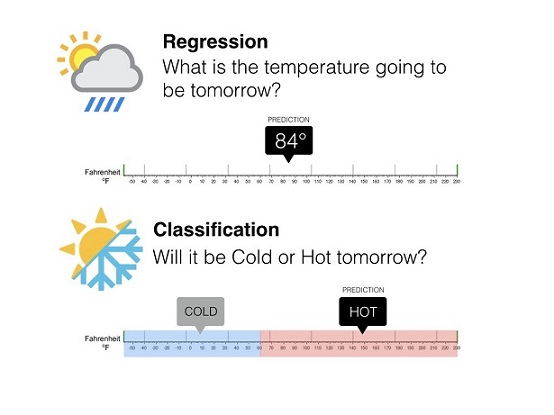

In [2]:
Image('../input/imgsnotebooks/temperaturas_classificacao.jpeg')


O objetivo de classificadores em aprendizado de máquina é de, com base nas observações existentes e suas respectivas classes, segmentar a feature space composta pelas variáveis dependentes $x$ em __regiões de decisão__, de forma que cada região de decisão do espaço vetorial esteja corretamente associada com a incidência de observações de determinada classe. Com essas regiões definidas, qualquer nova observação contida espaço vetorial pode ser classificada de acordo com sua posição dentro da feature space. A contabilização do erro nesse contexto serve para indicar ao modelo o quão bem os subespaços encontrados pelo algoritmo separam as observações existentes (leia-se vetores de $x$) com base em suas classes. Para demonstrar tudo isso, cria-se um dataset sintético com a função `make_classification` do pacote `sklearn`. Essa função retorna dois arrays numpy: um contendo a matriz $X$ com as variáveis independentes, e $Y$ contendo a variável alvo __discreta__.

In [3]:
X_2d, Y_2d = datasets_notebooks.Load_dataset_R2()

In [4]:
vs.display_matrix(X_2d, n_rows=5, label='X')
vs.display_vec(Y_2d[:5], label='Y')

<br>$X = \begin{bmatrix}2.67&2.23\\0.36&2.15\\2.66&2.32\\1.97&2.76\\2.08&3.08\end{bmatrix}$<br><br>

Dimensões da matriz: (300 x 2)



<br>$Y = \begin{bmatrix}1\\1\\1\\1\\1\end{bmatrix}$<br>

### 1.4 Classificação Binária

A variável resposta $Y$ é uma variável discreta e binária, que assume apenas dois valores inteiros: 0 ou 1, __rótulos__ ao invés de valores contínuos, e estão distribuídos em dois grupos de registros. Esse caso pode ser  definido como um problema de __classificação binária__. Se existem 2 classes apenas, subentende-se que a feature space será dividida em duas regiões, uma para a classe 0 e uma para a classe 1. Para separar um espaço vetorial de $n$ dimensões em $c$ regiões de classificação, o classificador precisa desenhar uma fronteira de decisão, uma <a href='https://en.wikipedia.org/wiki/Hypersurface'>hipersuperfície</a>, subespaço de dimensão $n - 1$, que separe o feature space nas regiões de decisão desejadas. No dataset de exemplo, o espaço vetorial é de $\left \{ x \in \mathbb{R}^2 \right \}$, dessa forma, o subespaço que divide as classes nesse espaço bi-dimensional deve ser um espaço __uni-dimensional__.
Já a complexidade geometrica dessa fronteira de decisão necessária para classificar satisfatóriamente os dados é o que define qual tipo de classificador é mais adequado para o problema de classificação. O gráfico de dispersão pode ser usado para descrever melhor a complexidade do problema de classificação:
 


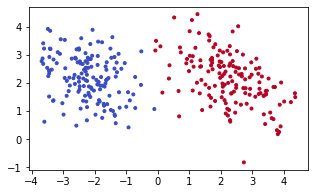

In [5]:
vs.scatter_plot(X_2d[:, 0], X_2d[:, 1], c=Y_2d)

Observando a distribuição de $x_1$ e $ x_2$ com base em $y$, a dimensão de $x_1$ parece ser mais explicativa do que $x_2$, fazendo um trabalho melhor para separar os dados em classe positiva e negativa. sendo que cada cluster está em um range específico de valores $(x_1 , x_2)$ de forma que eles não se sobrepõem em nenhum ponto. Dessa forma, os dados são __linearmente separáveis__ pois é possível encontrar uma função de reta ótima que separe perfeitamente todos os registros de cada grupo.

### 1.5 Classificação multi-classes

O caso binário pode ser expandido para o caso onde a variável alvo assume 3 ou mais valores, configurando assim uma tarefa de multi-classes: 





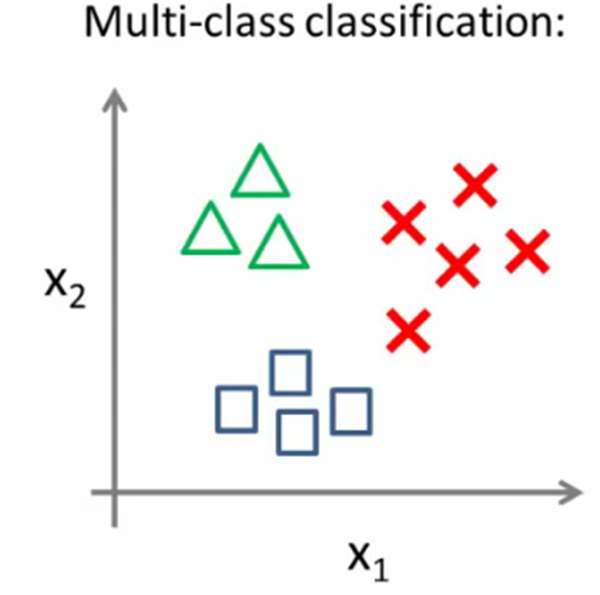

In [6]:
Image('../input/imgsnotebooks/multiclass.png', width=250)

Dois pontos relevantes a serem considerados aqui sobre classificiação múltipla. Em primeiro lugar, embora existam alguns algoritmos , em geral mais sofisticados, que suportam naturalmente uma previsão de múltiplas classes, nem todos os algoritmos de Machine Learning são naturalmente compatíveis com previsões de múltiplas classes. Uma abordagem para essas tarefas é de quebrar em tarefas bináres menores de forma que classificadores binários (chamados de classificadores base) possam ser treinados em conjunto para resolver o problema multi-classes. Dentro disso, duas __estratégias__ são bastante populares:

#### 1.5.1 One vs Rest (OvR)

Também chamado de <em> One vs All (OvA)</em> ou ainda <em>One Against All (OAA)</em>. Nessa estratégia, um classificador base é treinado para __cada__ classe possível, de forma que cada classificador torna-se especializado em distinguir essa classe do resto (por isso o nome <em>One vs Rest</em>). Dessa forma, para fazer uma nova previsão, cada classificador base retornará um score de confiança __contínuo__ de sua respectiva classe, e a classe com maior confiança será a classificação final através de uma simples função __arg max__ por exemplo. Supondo que existam 3 classes possíveis para um sample $x$, A,B e C, um classificador binário será treinado: 

- Classificador $f_1(x)$ treinado com classes A vs [B,C], 
- Classificador $f_2(x)$ treinado com classes B vs [A,C],
- Classificador $f_3(x)$ treinado com classes C vs [A,B]

A previsão final será: $y_k = \text{arg max} f_k(x)$, ou seja, a classe que recebeu a maior confiança por seu respectivo classificador

#### 1.5.2 One vs One (OvO)

Essa estratégia é semelhante à <em>OvR</em>, porém os classificadores não são mais especializados em uma classe versos as demais, mas sim em todas as situações de distinções existentes entre as classes, de forma que, dado que existem $K$ classes existentes, serão treinados $\frac{K(K - 1)}{2}$ classificadores e após isso, um algoritmo de __votação__ será utilizado para definir qual a classe final, onde a classe com mais votos é a classe final. Assumindo o mesmo exemplo acima, para 3 classes, tem-se o mesmo número de classificadores base se comparado com a estratégia OvR, mas com a premissa visivelmente diferente: 

- Classificador $f_1(x)$ treinado com classes A vs B, 
- Classificador $f_2(x)$ treinado com classes A vs C,
- Classificador $f_3(x)$ treinado com classes B vs C,

A classificação final será: 

$$\normalsize y_k = v\,\,(\,f_1(x)\,, f_2(x)\,, \cdots\, f_k(x))$$ 

Onde $v$ é uma função genérica qualquer que faz a votação da classe e $k = \frac{K(K - 1)}{2} = 3$ para o exemplo acima

Existem problemas de ambiguidade e desbalanceamento na confiança dos classificadores base que consistem em problemas consideráveis nas abordagens acima. Por opção, a classificação multi-classes e seus obstáculos não serão aprofundados agora, pois é mais simples e natural estudar tarefas e algoritmos e classificação binária, e depois generalizar suas aplicações para as heuristicas acima em casos de multiplas classes possíveis.



## 2. Classificadores Lineares

Voltando ao dataset sintético criado, é um problema de classificação ideal para classificadores lineares. Como o próprio nome sugere, esse modelos ajustam uma função linear que separa as observações no feature space. Existem semelhanças matemáticas com modelos de regressão, mas a premissa é fundamentalmente diferente: 



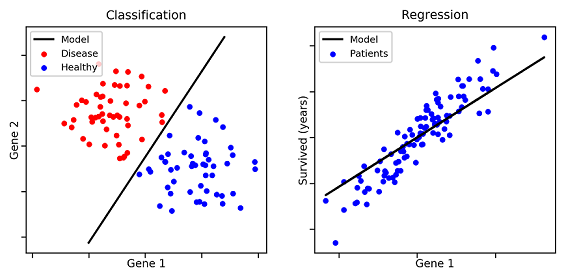

In [7]:
Image('../input/imgsnotebooks/hiperplano.png')


Em regressões lineares, o algoritmo ajusta um modelo linear em $\mathbb{R}^n$ aos dados de forma que a contabilização do erro em geral se dá pela distância de cada observação do conjunto de treino em relação a essa reta. Já classificadores lineares buscam encontrar um __vetor de coeficientes__ $w$ que possa ser usado como referência para separar o espaço vetorial nas regiões de decisão introduzidas acima. 

### 2.1 Modelo paramétrico

Modelos paramétricos são algoritmos que criam uma suposição priori sobre a distribuição dos dados, uma hipótese na forma de $f$. Entre os benefícios dessa abordagem, a velocidade de treino e a simplicidade do modelo são os mais destacados, mas, obviamente que uma suposição priori de uma função desconhecida pode resultar em uma modelo sub-ótimo, por isso, no caso de modelos paramétricos é interessante testar diferentes modelos, uma vez que testa-se diferentes funções, maximizando assim a chance de uma delas ajustar satisfatóriamente aos dados. O vetor de coeficientes compõe o modelo paramétrico descrito. O primeiro passo do classificador linear é descrever a variável $y$ como uma combinação linear das $n$ variáveis independentes em $x$:

$$\normalsize \hat{y_i} = w_1 x_1 + w_2 x_2 \cdots + w_n x_n$$

Os __parâmetros__, desse modelo linear são os coeficientes $w$, sendo um parâmetro por variável independente, de forma que $\left \{ W \in \mathbb{R}^n\right \}$: 

$$\normalsize x = \begin{bmatrix}x_1\\x_2\\ \vdots \\x_n \end{bmatrix} \,\,;\,\,  w = \begin{bmatrix}w_1\\w_2\\ \vdots \\w_n \end{bmatrix}$$

Como os coeficientes $w$ estão armazenados em um vetor, bem como os componentes de $x_i$, a maneira mais performática de aplicar o modelo linear a uma nova observação é através do __produto escalar__ (<em>dot product</em>) do vetor de observações $x$ pelo vetor de coeficientes $w$ (lembrando que $\left \{ w \in \mathbb{R}^n\right \}$).  O produto escalar tem esse nome pois ele não retorna um vetor, mas sim um escalar propriamente.

(1) $$\normalsize \left \langle w, x \right \rangle = \sum_n w_n x_n $$

<br><br>
<em>
<strong>Nota</strong>: Existem diferentes notações utilizadas para representar o produto escalar entre dois vetores: $\vec{w} \cdot \vec{x}$, ou simplesmente $wx$, ou ainda $w^T x$, onde $T$ é a <strong>transposta</strong> do vetor. Essas notações variam pois tanto $x$ quanto $w$ podem ser armazenados como linhas ou colunas, e o produto escalar entre dois vetores exige uma igualdade de dimensões (Colunas de A == Linhas de B). Para simplificar, o dot product entre dois vetores será representado pela notação $\left \langle w, x \right \rangle$, que costuma ser utilizada em alguns papers para representar por exemplo o inner product em um espaço euclidiano, o que pe equivalente ao produto escalar. O importante é garantir que o calculo correto seja computado, ou seja, os coeficientes corretos sendo multiplicados pelos componentes corretos de $x$ e que esses valores sejam somados, resultando em um escalar.
</em> 

### 2.2 Bias

Recordando a equação fundamental de retas ($y = wx + b$), sabe-se que uma reta é definida por um __coeficiente angular__, representado pelos pesos $w$, mas também um __coeficiente linear__ $b$, que determina o intercept da reta no eixo $Y$. Sem esse coeficiente, qualquer reta ou hiperplano necessariamente passará pela __origem__ do espaço vetorial das features, e isso cria uma restrição na hora de encontrar o vetor de coeficientes ótimo, pois muitas vezes a fronteira de decisão ótima não passa pelo centro. Em outras palavras, ignorar esse coeficiente quase que garantidamente vai limitar o modelo a encontrar uma solução sub-ótima. No contexto de aprendizado de máquina, o coeficiente linear é chamado de __bias__ (<em>viés</em> no português), e ele será um parâmetro treinável em classificadores lineares (e não lineares também). A função linear do classificador será: 

(1) $$f_{w,b}(x) = \left \langle w, x \right \rangle + b = \sum_n w_n\, x_n + b$$

Intuitivamente, o coeficiente linear pode ser lido como um coeficiente angular cujo input $x_n$ é simplesmente 1. Alternativamente, alguns autores em determinados papers preferem trabalhar com uma __matriz aumentada__ de $X$ e o bias como o coeficiente $0$ no vetor $W$, de forma que $wx + b$ pode ser reescrito como simplesmente $wx$. Supondo uma matriz de $X$ com 3 observações: 
<br><br><br>
$$\normalsize \begin{bmatrix} 1&x_{11} & x_{12} \\  1&x_{21} & x_{22}\\  1&x_{31} & x_{32} \end{bmatrix} \cdot \begin{bmatrix} w_0\\w_1\\w_2\\ \end{bmatrix} = \begin{bmatrix} w_0 + w_1x_{11} + w_2x_{12} \\  w_0 + w_1x_{21} + w_2x_{22}\\  w_0 + w_1x_{31} + w_2x_{32} \end{bmatrix}
$$

### 2.3 Classe Positiva e Negativa

Como a premissa de classificação é diferente da de regressão, a interpretação do escalar gerado pela função linear acima é diferente também. Em uma regressão, o modelo tem que __estimar__ o valor contínuo de $Y$, pois assume-se que $Y$ é uma combinação linear de outras variáveis. Por exemplo, se $Y$ é o preço de imóvel, o modelo precisa retornar um preço. $Y$ agora é uma classe, um rótulo, e não propriamente uma combinação linear de outras variáveis. O valor escalar retornado nesse caso implicitamente ainda é uma combinação linear de outras variáveis independentes, mas pode ser interpretado como um tipo de probabilidade, uma confiança que o modelo atribuí a um sample de ser pertencente a uma classe $c$:

$$\normalsize f_{w,b}(x_i) = \text{P}\,(c \,\,|\,\, x_i)$$

A abordagem usualmente utilizada por classificadores lineares em tarefas binárias é de tratar a classe 1 como sendo a __positiva__, e a classe 0 como sendo a __negativa__. O vetor de coeficientes deve ser ajustado aos dados de forma que a função linear retorne a probabilidade de um sample ser pertencente a classe positiva $\text{P}\,(1 \,\,|\,\, x_i)$. Dessa forma, a função linear ajustada de tais algoritmos atribuí um score menor do que zero para observações pertencentes a classe negativa, e vice versa, enquanto que valores próximos a 0 em teoria são aqueles próximos á área onde ambas as distribuições (da classe 0 e 1) se aproximam, o que denota menor confiança do modelo para classificar tal observação, essa região inclusive costuma ser chamada de __fronteira de decisão__ (do inglês <em>decision boundary</em>). 

Para demonstrar os conceitos acima, um modelo linear foi ajustado aos dados acima usando o __Perceptron__ do pacote `sklearn`. Esse classificador inclusive será introduzido formalmente no próximo notebook. Como os samples nesse exemplo são vetores em $\mathbb{R}^2$, o modelo linear terá dois coeficientes angulares $w$ e um coeficiente linear $b$ (o bias) e é representado como:

$$\normalsize \hat{y_i} = w_1 x_1 + w_2 x_2 + b$$

Abaixo são plotadas ambas as variáveis $x_1$ e $x_2$ e sua distribuição quanto a $y$:

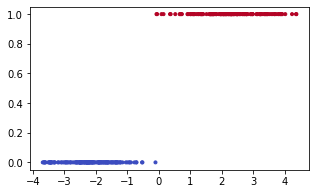

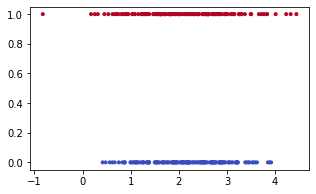

In [8]:
# Exibe plots
vs.scatter_plot(X_2d[:, 0], Y_2d, c=Y_2d)
vs.scatter_plot(X_2d[:, 1], Y_2d, c=Y_2d)

A dimensão de $x_1$ parece ser mais explicativa do que $x_2$, fazendo um trabalho melhor para separar os dados em classe positiva e negativa. Dessa forma, é de se esperar que um modelo linear ajustado a esses dados terá um coeficiente $w_1$ muito mais expressivo do que $w_2$, e isso de fato se confirmou quando um modelo linear foi treinado nesse dataset. O modelo linear final, que atribuí uma probabilidade de pertencimento à classe positiva para cada sample é o seguinte:

(2) $$\normalsize f(x) = 8.89 \cdot x_1 + 0.54 \cdot x_2 - 1$$

Abaixo é criado e exibido o vetor de coeficientes $w$ e o bias:

In [9]:
# Cria um numpy array contendo o vetor de coeficientes w
w = np.array([ 8.89, 0.54])
# Cria um escalar para representar o bias
bias = -1

# Exibe os vetores
vs.display_vec(w, label='w')
vs.display_vec([bias], label='b')

<br>$w = \begin{bmatrix}8.89\\0.54\end{bmatrix}$<br>

<br>$b = \begin{bmatrix}-1\end{bmatrix}$<br>

Cria uma função linear `linearFunc`que aplica o produto escalar de uma matriz de observações $X$ por um vetor de coeficientes $w$ e seguido pela soma do bias $b$

In [10]:
def linearFunc(X):
    # Retorna Y
    return np.dot(X,w) + bias


É interessante testar a premissa da fronteira de decisão, de que a função linear atribui valores positivos para a classe 1 e valores negativos para a classe 0. Abaixo uma matriz com diferentes sets de valores $(x_1, x_2)$ é criada para testar o modelo linear. Intencionalmente, foram selecionados 3 samples bem distintos: um que obviamente pertence a classe positiva, um que obviamente pertence a classe negativa, e um que se situa bem próximo da "separação" entre as classes

In [11]:
# Cria uma matriz numpy
sets_teste = np.array([[-3,2],
                       [0,2],
                       [3,1]])
# exibe matriz
vs.display_matrix(sets_teste, label='S')

<br>$S = \begin{bmatrix}-3&2\\0&2\\3&1\end{bmatrix}$<br><br>

Dimensões da matriz: (3 x 2)



Aplicando o modelo aos 3 vetores de amostra, o modelo chegou aos seguintes valores:

Para o sample $S_1 = \begin{bmatrix}-3\\2\end{bmatrix}$:

$$\normalsize f(S_1) = (8.89 \cdot -3) + (0.54 \cdot 2) - 1 = -26.59$$

Para o sample $S_2 = \begin{bmatrix}0\\2\end{bmatrix}$:

$$\normalsize f(S_2) = (8.89 \cdot 0) + (0.54 \cdot 2) - 1 = 0.08$$

Para o sample $S_3 = \begin{bmatrix}3\\1\end{bmatrix}$

$$\normalsize f(S_3) = (8.89 \cdot 3) + (0.54 \cdot 1) - 1 = 26.21$$

Esses valores por si só não dizem muito, a visualização abaixo deixa mais claro o que esses valores realmente significam:

In [12]:
# Aplica o modelo aos vetores sample
Z = linearFunc(sets_teste)

# Exibe vetor
vs.display_vec(Z, '\\left \\langle w, S \\right \\rangle + b')

<br>$\left \langle w, S \right \rangle + b = \begin{bmatrix}-26.59\\0.08\\26.21\end{bmatrix}$<br>

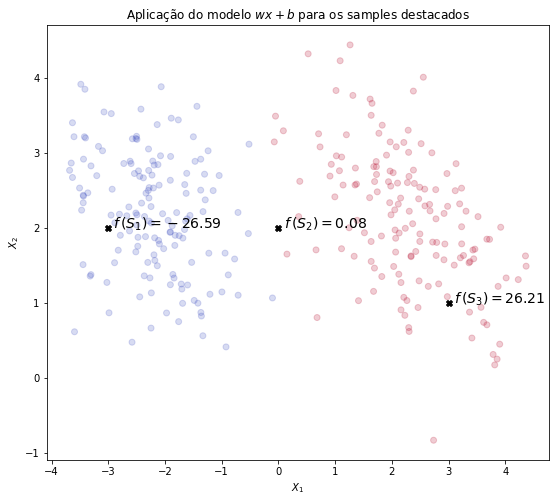

In [13]:
# Plota os vetores de sample
ax = vs.scatter_plot(sets_teste[:, 0], sets_teste[:, 1], size=(9,8), return_ax_obj=True, marker='X', color='black')

# Plota vetores originais do dataset
ax = vs.scatter_plot(X_2d[:, 0], X_2d[:, 1], c=Y_2d, ax_obj=ax, alpha=.2, return_ax_obj=True, marker='o')

# anota o valor atribuído pelo modelo para cada sample
for x_sample, z, i in zip(sets_teste, Z, [1,2,3]):
    ax.text(x_sample[0] + .09, x_sample[1], '$f\,(S_%d) = %.2f$' % (i,z), fontsize=14)

# Demais infos do gráfico
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Aplicação do modelo $wx + b$ para os samples destacados')
plt.show()

A estratégia de tratar uma classe como positiva e a outra como negativa explicada em __2.3__ fica muito mais evidente com o gráfico acima. Após ajustado, o modelo linear atribuí um score bem menor do que zero para o sample $X_1$ na extremidade externa do grupo de observações da classe negativa (0). Analogamente, para o sample $X_3$ localizado na extremidade oposta da região onde se encontram as observações de classe positiva, o modelo atribuiu praticamente o mesmo valor que em $X_1$, porém positivo. Basicamente, o modelo linear tem a mesma confiança para determinar que $X_1$ pertence a classe 0 e que $X_3$ pertence a classe 1. Mas o mais interessante é a região da fronteira de decisão sendo confirmada através do sample $X_2$. Como era esperado, o modelo atribuiu um valor próximo a zero para esse ponto, pois ele está em uma região da feature space onde ambos os clusters (da classe positiva e negativa) se encontram. É um cenário diferente das outras duas observações que estão nas extremidades opostas das suas classes, onde o modelo tem grande confiança para classificar. Sendo assim, para $X_2$ o modelo linear provavelmente atribuiu ele a classe positiva, mas a confiança dessa previsão é baixa.

### 2.4 Superfícies de Decisão

Toda a teoria acima fica muito mais clara com visualizações, e um plot bastante popular em ML é a __superfície de decisão__. A ideia por trás do plot é simples: para cada coordenada de $x$, o modelo retorna um valor de $y$, então o plot consiste basicamente em aplicar o modelo a uma grade de valores de $x$ e visualizar. A função `plot_superficie_decisao` importada pelo módulo `visualizacoes` espera um objeto classificador que contenha o método `predict`. Isso também é intencional: hoje em dia a maioria dos frameworks de Machine Learning contem algoritmos (de classificação, regressão, clusterização) que aplicam a função de decisão através de um método predict, de prever. Abaixo, criamos uma classe simples:

In [14]:
class Classificador(object):
    
    def __init__(self, decision_function):
        # Atribui a função de decisão
        self.DecisionFunction = decision_function
    
    def predict(self, X):
        # Aplica a função de decisão e retorna as previsões
        return self.DecisionFunction(X)

Instanciamos um classificador de modelo linear:

In [15]:
clf = Classificador(linearFunc)

Abaixo é plotada a superfície de decisão:

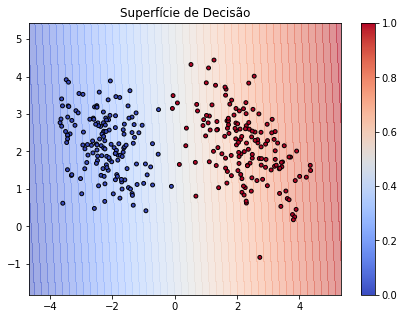

In [16]:
vs.plot_superficie_decisao(clf, X_2d, Y_2d, levels=50)

A fronteira de decisão gradual exibida acima vai de encontro com o que observamos no modelo. O modelo retorna valores cada vez mais positivos (representados pela cor vermelha) conforme $x_1$ aumenta, e valores cada vez mais negativos (representados pela cor azul) conforme $x_1$ diminue, e isso ocorre com algum grau de influência de $x_2$. O legal desse tipo de visualização é a noção de que após treinar um modelo linear, este está basicamente mapeando o espaço vetorial das variáveis independentes em regiões de decisão citadas no início deste notebook, o que porva-se uma maneira bastante visual e intuitiva de entender como o modelo se ajustou as features.

### 2.5 Thresholding Function 

A função linear encontrada é capaz de explicar a relação entre variável dependente e variáveis independentes, mas o output continua sendo um valor contínuo, e não a classe final da observação ($0$ ou $1$). Após explicar a relação entre as variáveis com um modelo paramétrico, classificadores lineares costumam utilizar um limiar, uma espécie de nota de corte (do inglês, <em>threshold</em>), para classificar uma observação com base na confiança que o modelo linear retorna sobre ele. Diferentes classificadores podem usar diferentes funções de threshold para classificar um score do modelo linear, como será explorado nos próximos notebooks. O threshold será representado aqui pela letra $\tau$. O threshold $\tau$ é definido como 0 dado que o modelo linear foi ajustado com a premissa da classe positiva e negativa, e esse valor representa a fronteira de decisão dentro da feature space. Traduzindo isso para o exemplo deste notebook, a __função de decisão__ final desse classificador será:

(2) $$\normalsize f_{w,b}(x_i) = \left\{\begin{matrix} 1 \text{   se }\left \langle w, x \right \rangle + b\geq  0\\ 0 \text{   se } \left \langle w, x \right \rangle + b <  0 \end{matrix}\right.$$

Implementando essa função no python:

In [17]:
def funcao_decisao(X):
    # Aplica a função linear
    z = np.dot(X,w) + bias
    # Retorna a classificação de cada valor de z usando o threshold = 0
    # 1 se x for maior ou igual a 0, senão 0
    return np.array([1 if x >= 0 else 0 for x in z])

Associa o método `Classifier.DecisionFunction` da instância `clf` á função criada acima

In [18]:
clf.DecisionFunction = funcao_decisao

A função acima pode ser representada como uma função composta $\sigma (z)$ onde $z$ representa o score atribuído pela função linear, e $\sigma$ representa a função que aplica um thresholds a esse score gerado em $z$. Essa representação é especialmente útil para derivar essas funções através da __regra da cadeia__. Isso será visto em detalhes nos próximos notebooks que abordam a descida de gradiente, redes neurais e o algoritmo de backpropagation.

Voltando ao exemplo dos vetores de amostra, primeiro calcula-se a função linear, lembrando que esses valores já foram computados e armazenados na variável `Z`:
<br><br>
$$\normalsize z_i = \left \langle w, x_i \right \rangle + b$$

Exibindo o score linear aplicado a cada vetor $x_i$ do conjunto de teste em `sets_teste`:

In [19]:
vs.display_vec(Z, label='Z_\\text{sample}')

<br>$Z_\text{sample} = \begin{bmatrix}-26.59\\0.08\\26.21\end{bmatrix}$<br>

Depois aplica-se o threshold, representado aqui por $\sigma$:

$$\normalsize \sigma \,(z_i) = \left\{\begin{matrix} 1 \text{   se }z_i\geq  0\\ 0 \text{   se }z_i <  0 \end{matrix}\right.$$

Aplicando o classificador aos dados da amostra de testes e exibindo o array final após aplicar o classificador com a função de threshold:

In [20]:
vs.display_vec(clf.predict(sets_teste), label='\\sigma(Z_\\text{sample})')

<br>$\sigma(Z_\text{sample}) = \begin{bmatrix}0\\1\\1\end{bmatrix}$<br>

Com esse classisficador instanciado com uma função de decisão adequada, é possível gerar as regiões de decisão mencionadas ao longo deste notebook:

Acurácia do modelo: 1.000



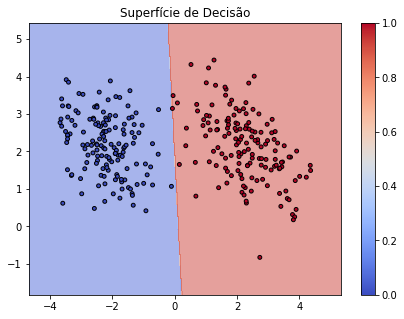

In [21]:
vs.plot_superficie_decisao(clf,X_2d, Y_2d, size=(7,5), print_acc=True)

Praticamente todos os conceitos abordados até o momento se confirmam com o plot acima: Como mencionado anteriormente, em tarefas de classificação binária, a tarefa do classificador é separar esse espaço em duas regiões de decisão, uma para a classe positiva, e o outro a classe negativa. Acima percebe-se que o objetivo foi cumprido, e o espaço vetorial composto por $X$ foi devidamente separado de forma que todas as observações da classe positiva estão na região de decisão da classe positiva, e vice-versa, de forma que o erro desse modelo para o conjunto de treino é igual a zero.

## 3. Hiperplano 

Classificadores lineares separam o espaço vetorial de features utilizando uma generalização da reta para qualquer espaço $n$-dimensional, e esse objeto geométrico é chamado de __hiperplano__. Dado um espaço dimensional de features em $\mathbb{R}^n$, o hiperplano de separação é um subespaço de $n - 1$ dimensões definido por:

$$\normalsize H_w = \left \{ x \in \mathbb{R}^n \,\,\, | \,\,\, \left \langle w, x \right \rangle + b = \tau \right \}$$

Onde $\tau$ representa o threshold do modelo. Por padrão em classificadores lineares $\tau = 0$, mas aqui optamos por trabalhar com $\tau$ por ser conveniente para traçar o hiperplano para qualquer threshold arbitrário, não apenas onde $\left \langle w, x \right \rangle + b = 0$. Isso é útil por exemplo para traçar as margens do hiperplano de separação em SVMs.

<img src='https://i.stack.imgur.com/FdO0n.png' width='500px'>

No caso do classificadores lineares, o hiperplano de separação encontrado representa a fronteira de decisão do espaço vetorial das features, ou seja, a região do espaço vetorial onde o modelo linear retorna zero:

$$\normalsize  \left \langle w, x \right \rangle + b = 0$$

### 3.1  Vetor normal do hiperplano

Quando o algoritmo de otimização do classificador linear está ajustando e minimizando o erro, o que o algoritmo está diretamente encontrando é o vetor de coeficientes $w$ ótimo dado algum critério de erro. O hiperplano de separação é uma consequência direta de se aplicar um threshold ao modelo linear: na superfície de decisão gradual, a primeira exibida, o modelo consistia apenas em aplicar o vetor de coeficientes ao espaço vetorial das features, o que cria uma espécie de gradiente ao invés de superfícies de decisão. Apenas após aplicar a função de threshold a esse modelo linear, a fronteira de decisão se transformou no hiperplano, pois aí sim o espaço vetorial foi dividido em sub-regiões. Dessa forma, para criar uma equação que de fato descreva esse sub-espaço, é necessário primeiro entender a relação entre o hiperplano e o vetor $w$. O hiperplano funciona como uma nota de corte em um vetor de pesos linear de forma que esse subespaço será <a href='https://en.wikipedia.org/wiki/Orthogonality'>ortogonal</a> em relação ao vetor normal de coeficientes $w$. 


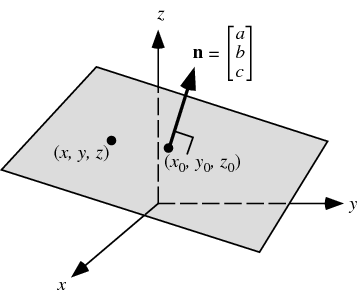

In [22]:
Image('../input/imgsnotebooks/normal_vector.gif')

Abaixo é feito uma demonstração dessa relação entre um vetor de pesos e o hiperplano formado por ele. Para simplificar o exemplo, define-se que esse hiperplano passa pela origem desse espaço vetorial de forma que a equação que descreve o hiperplano tem coeficiente linear / bias e o threshold iguais à zero $b = 0\,\,;\,\,\tau = 0$:

$$\normalsize H = \left \{ p \in \mathbb{R}^3 \,\,|\,\, \left \langle \vec{n}, p \right \rangle = 0 \right \}$$



Onde $\vec{n}$ representa um vetor normal desse hiperplano (leia-se um vetor de coeficientes) e $p$ é um ponto $(x,y,z)$ nesse espaço. Considerando $p_0$ como um vetor nulo que representa a origem desse espaço, sabe-se que a origem encontra-se no hiperplano pois satisfaz a equação do hiperplano:

$$\normalsize \left \langle \vec{n}, p_0 \right \rangle = 0$$

Cria um vetor de pesos arbitrário e o vetor nulo representando a origem:

In [23]:
# cria vetor normal
N = np.array([1.9,.7,3])

# cria vetor p0
P0 = np.zeros(3)

# exibe os vetores
vs.display_vec(N, '\\vec{n}')
vs.display_vec(P0, 'p_0')

<br>$\vec{n} = \begin{bmatrix}1.90\\0.70\\3\end{bmatrix}$<br>

<br>$p_0 = \begin{bmatrix}0\\0\\0\end{bmatrix}$<br>

Agora, considera-se um segundo ponto $p_1$

In [24]:
# cria o vetor p1
P1 = np.array([3.5, -3, -(-0.63333*(-3.5) - 0.2333333*(3))])

# exibe vetor
vs.display_vec(P1, 'p_1')

<br>$p_1 = \begin{bmatrix}3.50\\-3\\-1.52\end{bmatrix}$<br>

Sabe-se que esse ponto também se encontra no hiperplano pois $\left \langle \vec{n}, p_i \right \rangle = 0$ da mesma forma como $\left \langle w, x_0 \right \rangle = 0$:

In [25]:
print('Produto escalar entre os vetores: %.3f' % np.dot(P1, N))

Produto escalar entre os vetores: 0.000


Sendo assim, é possível igualar ambas as equações:

$$\normalsize \left \langle \vec{n}, p_0 \right \rangle = \left \langle \vec{n}, p_1 \right \rangle$$

$$\normalsize \left \langle \vec{n}, p_0 - p_1 \right \rangle = 0$$

Ou seja, a diferença entre os dois pontos é um vetor que também se encontra no hiperplano (e qualquer outro ponto entre eles também por consequência) e que também é perpendicular ao vetor normal, e o produto escalar entre eles será 0, o que significa que ambos também são __perpendiculares entre si__

In [26]:
# computa o vetor de diferença
P_diff = P0 - P1

# exibe
vs.display_vec(P_diff, '(p_0 - p_1)')
print('Produto escalar entre vetores: %.3f' % np.dot(N, P_diff))

<br>$(p_0 - p_1) = \begin{bmatrix}-3.50\\3\\1.52\end{bmatrix}$<br>

Produto escalar entre vetores: -0.000


É possível ilustrar o exemplo acima plotando o hiperplano e vetores para visualizar o ângulo de 90º entre eles.

<em>NOTA: A equação que desenha o hiperplano é explorada em 3.2</em>

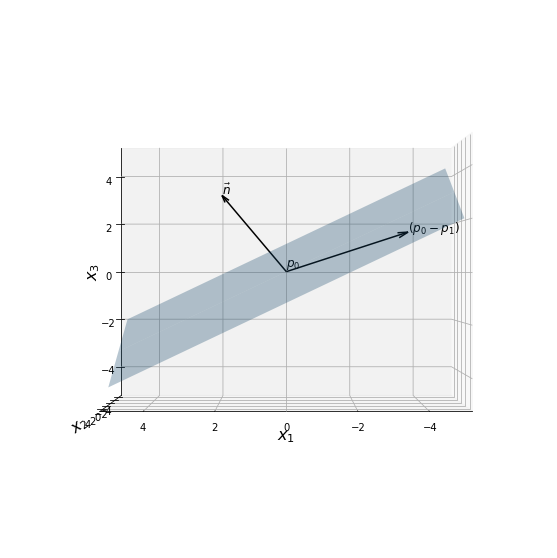

In [27]:
# Cria uma função 
H = mf.hyperplane_function(N)

# Define coordenadas para plotar a superfície do hiperplano
x_coord, y_coord = np.meshgrid(*[np.linspace(-5,5,3) for i in range(2)])

# Cria uma matriz de valores para aplicar a função do hiperplano e encontrar a última dimensão
grid_xy = np.c_[x_coord.flatten(), y_coord.flatten()]

# Consolida o grid completo de coordenadas
coords = [x_coord, y_coord, H(grid_xy).reshape(x_coord.shape)]
    
# Outras especificações necessárias para gerar o plot
lims = [(-5,5) for i in range(3)]
labels = ['$\\vec{n}$', '$(p_0 - p_1)$']
vecs = [N, P_diff]

# visualizando plano e vetores
ax = vs.plot_vecs_3d(vecs, return_ax_obj=True, ax_lims=lims, labels=labels, label_offset=.1, size=(10,10), ax_offset=3 )
ax = vs.plot_plane(*coords, ax_obj=ax, alpha=.3, elev=0, azim=90, return_ax_obj=True)
t = ax.text(0,0,0.1 +.09,'$p_0$', fontsize=12)

### 3.1.1 Ângulo entre vetores

É perceptível acima que o ângulo formado entre o vetor normal $\vec{n}$ e o hiperplano ou qualquer ponto pertencente a ele é de 90°, mas nem sempre ele será visualmente perpendicular por questões de distorções no plot e eixos em escalas diferentes. Matemáticamente, o produto escalar entre o vetor normal $\vec{n}$ e um vetor resultante $p_0 - p_i$ qualquer sendo igual a zero é o que nos indica que o ângulo entre os vetores é de fato 90º. O produto escalar, ou produto interno de um vetor é na realidade uma medida que relaciona a magnitude dos vetores com o __ângulo__ formado entre eles, e pode ser reescrito de maneira alternativa como:

$$\normalsize \left \langle w,x \right \rangle = \left \| w \right \| \left \| x \right \| \,\text{cos}(\theta)$$

Onde $\text{cos}$ é o __cosseno__ de $\theta$, que representa justamente o ângulo entre os vetores:

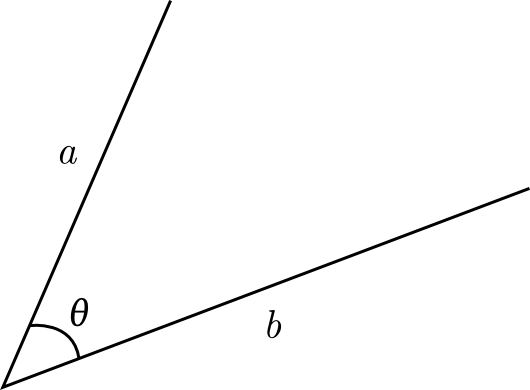

In [28]:
Image('../input/imgsnotebooks/angle_bare.png', width=300)

Podemos por exemplo trabalhar a equação isolando $\theta$ de forma a retornar o ângulo entre dois vetores a partir do produto escalar entre eles:

(1) $$\normalsize \left \langle w,x \right \rangle = \left \| w \right \| \left \| x \right \| \,\text{cos}(\theta)$$

(2) $$\normalsize \text{cos}(\theta) = \frac{\left \langle w,x \right \rangle}{\left \| w \right \| \left \| x \right \|}$$

(3) $$\normalsize \theta= \text{arccos} \left (\frac{\left \langle w,x \right \rangle}{\left \| w \right \| \left \| x \right \|} \right )$$

No exemplo do vetor normal, sabemos que qualquer vetor presente no hiperplano é perpendicular ao vetor normal pois o produto escalar entre os vetores é zero, sendo assim:

$$\normalsize \theta_{n, p} = \text{arccos} \left (\frac{0}{\left \| w \right \| \left \| x \right \|} \right ) = \text{arccos}(0) \approx 1.5708$$

O __arco cosseno__ de 0 é aproximadamente $1.5707$ radianos, que, quando convertido para graus, é precisamente 90 graus, ou seja, quando dois vetores forem perpendiculares entre si, seu produto escalar deve ser 0. Aplicando a função para os vetores descritos acima, chegamos exatamente nos 90 graus esperados:

In [29]:
print('Produto escalar entre os vetores: %.3f' % np.dot(N, P_diff))
print('Ângulo entre os vetores em radianos: %.4f' % mf.get_angle(N, P_diff))
print('Ângulo entre os vetores em graus: %d°' % mf.get_angle(N, P_diff, return_degrees=True))

Produto escalar entre os vetores: -0.000
Ângulo entre os vetores em radianos: 1.5708
Ângulo entre os vetores em graus: 90°


É possível demonstrar as equações acima da mesma forma com o dataset sintético criado. Abaixo a superfície de decisão do classificador é exibida em conjunto com o vetor de coeficientes $w$ e o seu produto escalar e respectivo ângulo com cada um dos vetores de teste criados anteriormente. Além disso, plota-se o vetor de coeficientes com uma norma reduzida ($\left \| w \right \| = 2.5$ no caso), uma vez que o vetor de coeficientes original possuí uma norma alta de forma que ao plotá-lo na superfície abaixo, ele se distancia muito das observações de $X$ e distorce o plot:

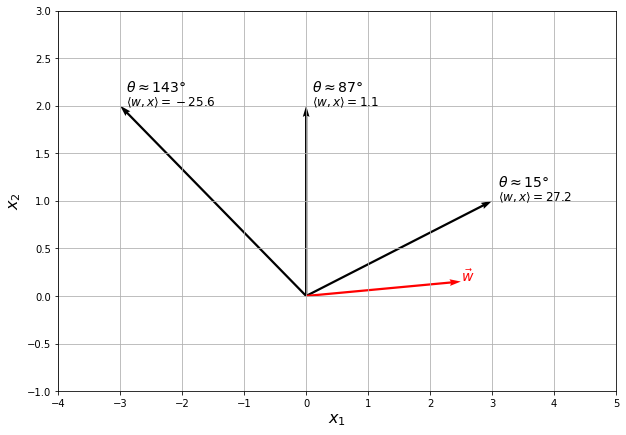

In [30]:
# Os rótulos dos vetores são o produto escalar destes com o vetor de pesos
dot_prods = ['$\\left \\langle w,x \\right \\rangle =  %.1f$' % dot_prod for dot_prod in np.dot(sets_teste, w)]

# Exibe os vetores de teste
ax = vs.plot_vecs_2d(
    sets_teste,
    labels=dot_prods,
    label_offset=0.1,
    ax_lims=[(-4,5) ,(-1,3)], 
    return_ax_obj=True,
    width=.004,
)

# Redimensiona a norma de W, ||W|| = 2.5
w_rescaled = mf.unit_vec(w, l=2.5)
# exibe o vetor de coeficientes 
ax.quiver(0, 0, w_rescaled[0], w_rescaled[1], angles='xy', scale_units='xy', scale=1, width=.004, color='red')
# anota o vetor
ax.text(w_rescaled[0], w_rescaled[1], '$\\vec{w}$', fontsize=14, color='red')

# anota o valor atribuído pelo modelo para cada sample, bem como ângulo
for x_sample in sets_teste:
    # Computa o ângulo theta entre o sample e o vetor de coeficientes
    angle =  mf.get_angle(w, x_sample, return_degrees=True)
    # anota os valores no plot
    ax.text(x_sample[0] + .1, x_sample[1] + 0.15, '$\\theta \\approx  %.d$°' % int(angle), fontsize=14)

# finaliza exibindo a grade    
ax.grid()

Os valores para o sample do meio são interessantes. O dot product é igual á $1.1$, bem próximo a zero, o que se demonstra na sua proximidade á fronteira de decisão e também demonstra seu ângulo em relação a $w$ como 87°, quase perpendicular. O funcionamento dos classificadores lineares fica mais intuitivo quando interpretado pelos ângulos. O vetor de pesos está apontando sempre pra região positiva do feature space, ou seja, a região onde o produto escalar com esse vetor é maior ou igual a zero, ou em termos de ângulo, o ângulo entre esse ponto e o vetor de pesos é de no máximo 90°, enquanto que ângulos maiores do que isso demonstram que o vetor em questão está apontado para o sentido oposto da região positiva, e portanto a classe daquele vetor deve ser negativa.

#### 3.1.2 Norma de um vetor 

No tópico anterior, muitas vezes foi mencionado o termo <em>"norma do vetor"</em>, inclusive na equação alternativa do produto escalar percebe-se que a norma de um vetor $\vec{v}$ é simbolizada como $\left \| \vec{v} \right \|$. A norma de um vetor nada mais é do que seu sua magnitude. No caso da física (onde calculos vetoriais são basicamente rotina), o comprimento do vetor costuma representar a intensidade de uma força, enquanto que o vetor em si representa a direção da propagação dessa força. Já no caso de aprendizado de máquina e ciência de dados, existem muitas aplicações diferentes para norma de um determinado vetor, por exemplo:

- medida de distância em algoritmos de clusterização
- critério de parada em algoritmos de otimização 
- regularização de modelos prevenindo overfitting

Um exemplo é a função própria `unit_vec` que foi usada no plot acima para redimensionar o comprimento de $w$ para que esse coubesse no plot sem distorcê-lo. Vetores com a norma igual á 1 são os famosos __vetores unitários__ (unit vectors), $\left \| \vec{v} \right \| = 1$, que podem ser encontrados simplesmente dividindo um vetor pela sua norma original. E se quisermos uma norma arbitrária (como no plot acima que especificamos 2.5 de norma), basta multiplicar o vetor unitário por um escalar:

$$\normalsize v_\text{scale} = \lambda \left ( \frac{v}{\left \| v \right \|} \right )$$

Onde $\lambda$ funciona como uma espécie de __autovalor__ do vetor $v$ (esse conceito está fortemente relacionado a <em>eigendecomposition</em> vista em algoritmos de redução de dimensionalidade por exemplo). É sempre importante resaltar que a conta acima altera __apenas__ a norma do vetor, nunca a sua direção. Observe o exemplo abaixo:


<br>$\begin{bmatrix}3&2\\0.83&0.55\\1.66&1.11\end{bmatrix}$<br><br>

Dimensões da matriz: (3 x 2)



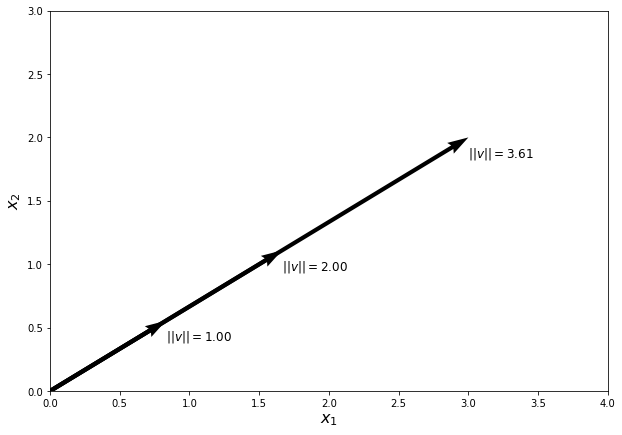

In [31]:
# cria um vetor de base
vec_base = np.array([3,2])
# Cria variações desse vetor com ||v|| = 1 e 2
vec_custom_norm = [mf.unit_vec(vec_base, l=i) for i in [1, 2]]
# armazena os vetores em uma matriz
vecs_plot = np.vstack([vec_base, vec_custom_norm])
# exibe a matriz de vetores
vs.display_matrix(vecs_plot)

# exibe no plot
labels = ['$||v|| = %.2f$' % np.linalg.norm(v) for v in vecs_plot]
vs.plot_vecs_2d(vecs_plot, ax_lims=[(0,4),(0,3)], labels=labels, label_offset=-.15, ax_offset=1)

#### 3.1.3 L1-norm

A equação abaixo descreve a norma p (de <em>p-norm</em>), que é a maneira mais comum de se computar a norma de um vetor, onde, para cada valor de $p$, estamos computando um tipo de norma diferente. No caso da documentação do numpy, $p$ é anâlogo ao argumento `ord`:

$$\normalsize \left \| v \right \|_p = \left (\sum_{i}^{n} |v_i|^p \right )^{\frac{1}{p}}$$

Em geral as normas com $p=1$ e $p=2$ são as mais utilizadas e mencionadas. Quando $p=1$, estamos calculando a __L1-norm__, que é cálculo mais simples da norma. Substituindo $p$ por $1$, a equação geral acima fica bem simples: 

$$\normalsize \left \| v \right \|_1 = \sum_{i}^{n} |v_i| = |v_1| + |v_2| \cdots |v_n|$$

Onde $|v_n|$ é simplesmente o valor absoluto do componente $n$ do vetor $v$. Uma maneira de computar a norma L1 é a seguinte: 


In [32]:
L1_norm = lambda vec: sum(abs(vec))

Comparando com a implementação do numpy (observe que o argumento `ord` é definido como 1 para calcular a norma L1)

In [33]:
print('np.linalg.norm: %.4f ' % np.linalg.norm(np.array([2,2]), ord=1))
print('Função L1_norm: %.4f ' % L1_norm(np.array([2,2])))

np.linalg.norm: 4.0000 
Função L1_norm: 4.0000 


#### 3.1.4 L2-Norm

Já quando $p$ assume o valor de 2, estamos computando a norma padrão e mais intuitiva que tem, a __L2-Norm__, que assume a equação abaixo:

$$\normalsize \left \| v \right \|_2 = \left (\sum_{i}^{n} |v_i|^2 \right )^{\frac{1}{2}} = \sqrt{\sum_{i}^{n} v_i^2 } = \sqrt{v_1^2 + v_2^2 \cdots v_n^2}$$

Uma maneira direta de se computar a norma L2 é aplicando a raíz quadrada ao dot produto entre o vetor e si mesmo na transpósta:

In [34]:
L2_norm = lambda vec: (np.dot(vec, vec.T))**(1/2)

Novamente, comparando com a implementação do numpy. Nesse caso não é necessário passar o argumento `ord` pois por padrão a norma L2 é computada com essa função, mas passaremos o argumento para deixar explícito:

In [35]:
print('np.linalg.norm: %.4f ' % np.linalg.norm(np.array([2,2]), ord=2))
print('Função L2_norm: %.4f ' % L2_norm(np.array([2,2])))

np.linalg.norm: 2.8284 
Função L2_norm: 2.8284 


#### 3.1.5 Medidas de distância vetorial

As normas de vetor estão em essencia descrevendo a __distância__ entre dois pontos (sendo um deles a origem). A primeira coisa a se considerar é que qualquer vetor pertencente a um determinado espaço vetorial e pode ser escrito como a combinação dos vetores __base__ desse espaço vetorial. A base nada mais é do que o conjunto de vetores linearmente independentes que projetam o espaço vetorial. Por padrão são vetores unitários que formam os eixos do espaço vetorial, ou seja, se o espaço vetorial é tri-dimensional, existem 3 vetores base, e assim por diante. Para os casos mais comuns ($\mathbb{R}^2$ e $\mathbb{R}^3$) costumasse chamar os vetores que constituem a base desses espaços como $i,j,k$ ou $e_1, e_2, e_3$. Ao ordenar os vetores base como vetores coluna de uma matriz, forma-se uma matriz identidade:

$$\normalsize \begin{bmatrix}e_1&e_2&e_3\end{bmatrix} = \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$$ 

Agora, supondo que exista um vetor arbitrário em $\mathbb{R}^2$ para simplificar:

$$\normalsize \vec{v} = \begin{bmatrix}2\\2\end{bmatrix}$$

Como mencionado, o vetor pode ser reescrito como a combinação dos vetores base:

(1) $$\normalsize \vec{v} = x \, e_1 + y \, e_2$$

(2) $$\normalsize \vec{v} = x \begin{bmatrix}1\\0\end{bmatrix} + y \begin{bmatrix}0\\1\end{bmatrix}$$

(3) $$\normalsize \vec{v} = \begin{bmatrix}x\\0\end{bmatrix} + \begin{bmatrix}0\\y\end{bmatrix} = \begin{bmatrix}x + 0\\0 + y\end{bmatrix} = \begin{bmatrix}x\\y\end{bmatrix}$$

Para o vetor descrito acima, já sabe-se que $x = 2$ e $y = 2$. Ou seja, os componentes de $\vec{v}$ são essencialmente os vetores base do espaço vetorial multiplicados por um coeficiente que representa a magnitude do componente. É exatamente como a ilustração abaixo:


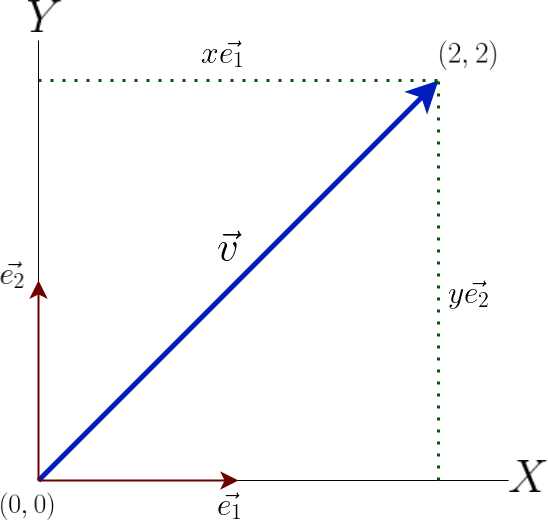

In [36]:
Image('../input/imgsnotebooks/normas_vetores.png', width=400)

Os vetores em vermelho são os vetores base do espaço $\mathbb{R}^2$. Os componentes que definem o vetor $\vec{v}$ são como mencionado, a combinação dos vetores base do espaço multiplicados pelos coeficientes $x,y$, sendo um por componente / dimensão. A magnitude do vetor também pode ser encarada como a __distância__ entre dois pontos (sendo um deles a origem). Em L1-norm, a magnitude do vetor essencialmente é descrita como a quantidade de vetores bases necessários para compor o vetor final, que no final, será basicamente somar os valores absolutos de $x$ e $y$. Esse cálculo também é chamado de __distância manhattan__ pois (com um pouco de esforço mental) esse cálculo acaba transformando o espaço vetorial em uma grade quadricular de vetores base e depois computando a menor quantidade de "quarteirões" necessárias para se transitar de um ponto ao outro.



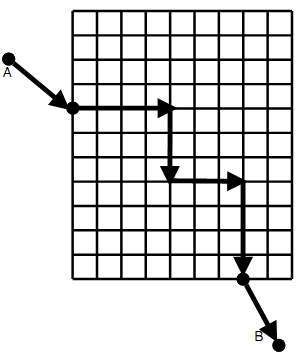

In [37]:
Image('../input/imgsnotebooks/manhattan_dist.png', width=200)

Já a norma L2-Norm é muito mais intuitiva do que a L1-Norm, ao menos quando tratamos da distância entre os pontos. Na escola aprendemos um teorema extremamente simples e conhecido chamado de __Teorema de Pitágoras__:

<img src='http://www.brasilescola.com/upload/e/Untitled-25(1).jpg'>

Onde a hipotenusa $a$ é calculada com a famosa equação:

$$\normalsize a^2 = b^2 + c^2$$

Observando de novo a imagem do vetor acima, fica nítido que a hipotenusa no teorema é precisamente a norma do vetor através dos catetos (leia-se componentes do vetor descritos por $x,y$), e substituindo os valores dos vetores no teorema de pitágoras, e essa distância é chamada de __distância euclidiana__, que é a medida de distância vetorial padrão para inúmeros algoritmos supervisionados e não supervisionados (em especial clustering):

$$\normalsize \left \| v \right \|_2^2 = x^2 + y^2$$

Trabalhando a equação para remover o expoente de $\vec{v}$ e substituindo $x,y$ pelos componentes $v_1$ e $v_2$, chegamos exatamente na fórmula da L2-norm:

$$\normalsize \left \| v \right \|_2 = \sqrt{v_1^2 + v_2^2}$$

Que pode ser expresso como a distância euclidiana entre os pontos $u = (0,0)$ e $p = (2,2)$:

(1) $$\normalsize d(u,p) = \sqrt{(u_1 - p_1)^2 + (u_2 - p_2)^2}$$

(2) $$\normalsize d(u,p) = \sqrt{(0-2)^2 + (0-2)^2}$$

(3) $$\normalsize d(u,p) = \sqrt{8} \approx 2.8284$$

### 3.2 Equação para desenhar o Hiperplano 

Muitas vezes no contexto de aprendizagem de máquina, pode ser interessante visualizar o hiperplano de separação encontrado pelo algoritmo (óbviamente para os casos $\mathbb{R}^2$ e $\mathbb{R}^3$). O hiperplano nada mais é do que um subespaço $(n-1)$-dimensional plano separando um espaço $n$-dimensional e sendo assim, a equação do hiperplano deve assumir a forma da __equação reduzida da reta__, que na realidade, já é a equação que está sendo abordada desde o início:

$$\normalsize y = wx + b$$

Seguindo esse racional, precisamos adaptar a equação do hiperplano à equação reduzida da reta mostrada acima. Basicamente, isóla-se a última dimensão da equação, $x_n$, e a trata como $y$. Dessa forma, $y$ será um plano projetado pelas $n-1$ primeiras dimensões, desenhando assim o subespaço mencionado.

$$\normalsize  \left \langle w,x \right \rangle + b = \tau  \rightarrow  y = wx + b$$

Lembrando novamente que $\tau$ é o threshold de classificação, que por padrão é 0.

#### 3.2.1 Visualizando o Hiperplano em $\mathbb{R}^2$

No caso onde $\left \{ x, w \in \mathbb{R}^2\right \}$, $H$ geométricamente será uma reta, um plano unidimensional:

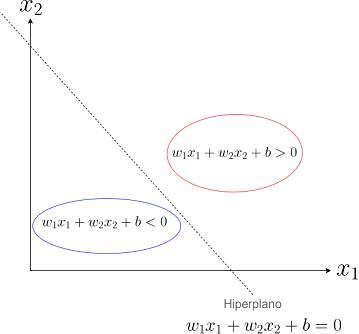

In [38]:
Image('../input/imgsnotebooks/grafico_hiperplano.png')

Para dados bidimensionais, a equação que satisfaz o hiperplano, possuí duas variáveis ($x_1, x_2$). Seguindo o descrito acima, isola-se a dimensão $x_2$ como $y$ na equação de uma reta unidimensional. A dimensão restante $x_1$ será a variável "independente" de $x_2$:

(1) $$\normalsize  w_1x_1 + w_2x_2 + b = \tau$$

(2) $$\normalsize  w_1x_1 + w_2x_2 = \tau - b$$

(3) $$\normalsize  x_2 = \frac{\tau - b - w_1x_1}{w_2}$$

Reescrevendo de acordo com a equação reduzida da reta:

$$\normalsize  x_2 = -\frac{w_1}{w_2}x_1 + \frac{\tau - b}{w_2}$$

Onde o coeficiente angular da linha que descreve o hiperplano é $w = \frac{- w_1}{w_2}$, o coeficiente linear $b = \frac{\tau - b}{w_2}$ e $x_1$ como mencionado passa a ser a variável independente dessa reta, descrevendo assim um subespaço linear em $(2 - 1)$ dimensões. Com essa equação, basta aplicá-la a uma grade de valores de $x_1$ para desenhar o hiperplano:




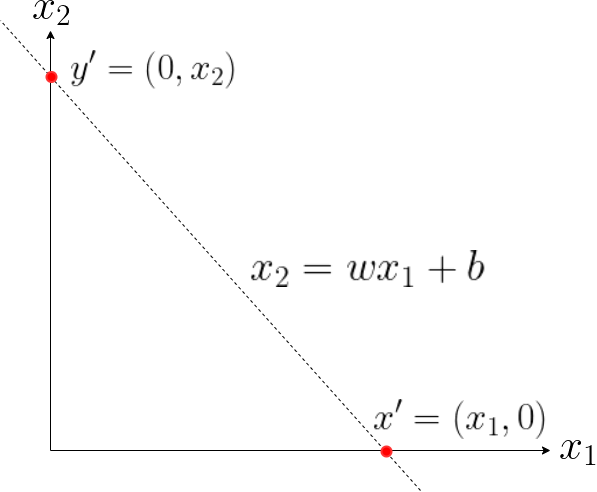

In [39]:
Image('../input/imgsnotebooks/equacao_hiperplano.png', width=350)

A função que descreve o hiperplano é então uma linha. E equação final que desenha o hiperplano encontrado anteriormente e levando em consideração que $\tau = 0$ fica assim:

$$\normalsize x_2 = \frac{-8.89}{0.54}x_1 - \frac{(0-1)}{0.54}  = -16.46x_1 + 1.85$$

Construindo a função anônima `H` que recebe valores de $x_1$ e desenha o hiperplano:

In [40]:
H = lambda X: np.array([-16.46*x[0] + 1.85 for x in X])

Agora basta aplicar a função gerada acima para encontrar os valores de $x_2$ no espaço de $x_1$ que satisfazem a equação do hiperplano e criar uma visualização dos dados e o hiperplano encontrado. Primeiro cria uma grade de valores de $x_1$:


In [41]:
# Cria uma grade de valores x_1 para aplicar a função
grade_x1 = np.expand_dims(np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max()), axis=-1)

# exibe o vetor
vs.display_matrix(grade_x1, n_rows=5, label='x_1')

<br>$x_1 = \begin{bmatrix}-3.68\\-3.52\\-3.35\\-3.19\\-3.03\end{bmatrix}$<br><br>

Dimensões da matriz: (50 x 1)



Aplica a função `H`e encontra os respectivos valores de $x_2$ que junto com $x_1$ satisfazem a equação do hiperplano:

In [42]:
# computa os respectivos valores de x_2
grade_x2 = H(grade_x1)

# exibe o vetor
vs.display_vec(grade_x2[:5], label='x_2')

<br>$x_2 = \begin{bmatrix}62.47\\59.77\\57.06\\54.36\\51.66\end{bmatrix}$<br>

tomando o primeiro vetor encontrado como exemplo, é possível confirmar que ele se encontra no hiperplano aplicando a equação:

In [43]:
# Cria um vetor encontrado pela função acima para testar a equação do hiperplano
vec_teste = np.array([grade_x1[0][0], grade_x2[0]])

# exibe vetor de teste
vs.display_vec(vec_teste)

# exibe resultado arredondado do produto escalar entre o vetor teste e o vetor de coeficientes
print('Dot product: %d' % round(np.dot(vec_teste, np.array([8.89, 0.54])) - 1))

<br>$\begin{bmatrix}-3.68\\62.47\end{bmatrix}$<br>

Dot product: 0


O produto escalar entre o vetor encontrado pela função e o vetor de coeficientes do hiperplano é igual a zero, o que significa dizer que este vetor __satisfaz__ a equação do hiperplano e portanto se encontra no mesmo. Seguindo, abaixo é gerada a visualização dos vetores encontrados acima. Percebe-se que essa função desenhou corretamente o hiperplano de separação do modelo 

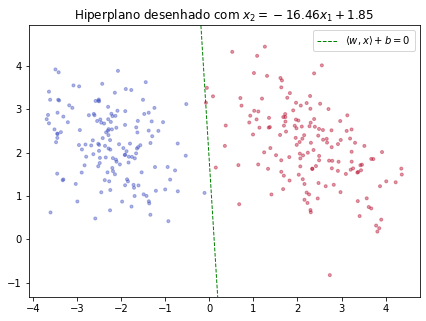

In [44]:
# Gráfico de dispersão
ax = vs.scatter_plot(X_2d[:, 0], X_2d[:, 1], c=Y_2d, alpha=.4, size=(7,5), title='Hiperplano desenhado com $x_2 = -16.46x_1 + 1.85$', return_ax_obj=True)

# Função que desenha o hiperplano
ax.plot(grade_x1, grade_x2, color='green', linewidth=1, linestyle='--', label='$\\left \\langle w, x \\right \\rangle + b = 0$')

# demais personalizações do plot
ax.legend()
lim = ax.set_ylim(X_2d[:, 1].min() - .5, X_2d[:, 1].max() + .5)

$\tau$ como mencionado é útil na equação para permitir desenhar o hiperplano em outras regiões além da fronteira de decisão. Com a função criada, é possível desenhar as regiões de decisão aos quais os 3 vetores de teste do início deste notebook se encontram. O score linear atribuído a cada um daqueles vetores novamente:

In [45]:
vs.display_vec(Z)

<br>$\begin{bmatrix}-26.59\\0.08\\26.21\end{bmatrix}$<br>

Adaptando a função para permitir um valor arbitrário para $\tau$:

In [46]:
H = lambda X, tau: np.array([-16.46*x[0] + (tau + 1) / 0.54 for x in X])

Abaixo são plotados esses 3 hiperplanos arbitrários. Observe que alterar o valor do threshold não afeta o coeficiente angular do hiperplano. O threshold se comporta como o coeficiente linear do hiperplano. Isso fica até evidente se observarda a equação que desenha o hiperplano, onde tanto o threshold $\tau$ quanto o bias do modelo fazem parte do termo que representa o coeficiente linear do hiperplano

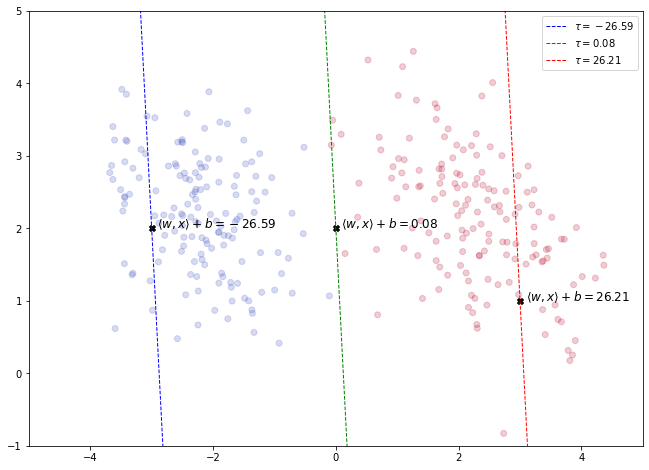

In [47]:
# Scatter plot dos vetores
ax = vs.scatter_plot(sets_teste[:, 0], sets_teste[:, 1], size=(11,8), return_ax_obj=True, marker='X', color='black')
ax = vs.scatter_plot(X_2d[:, 0], X_2d[:, 1], c=Y_2d, ax_obj=ax, alpha=.2, return_ax_obj=True, marker='o')

# Desenha o hiperplano para os 3 valores de threshold 
for tau, color in zip(Z, ['blue', 'green', 'red']):
    ax.plot(grade_x1, H(grade_x1, tau), color=color, linewidth=1, linestyle='--', label='$\\tau = %.2f$' % tau)
    
# anota o valor atribuído pelo modelo para cada sample
for x_sample, z in zip(sets_teste, Z):
    ax.text(x_sample[0] + .09, x_sample[1], '$\\left \\langle w, x \\right \\rangle + b = %.2f$' % z, fontsize=12)

# demais definições do gráfico    
ax.set_ylim(-1, 5)
ax.set_xlim(-5, 5)
ax.legend()
plt.show()

#### 3.2.2 Visualizando o Hiperplano em $\mathbb{R}^3$

Aplicando a mesma lógica do hiperplano unidimensional, o hiperplano em um espaço vetorial $\mathbb{R}^3$ será um plano bidimensional representado pela equação $y = w_1x_1 + w_2x_2 + b$. A mesma abordagem é utilizada aqui, de resolver a última dimensão ($x_3$ no caso) de forma que satisfaça $\left \langle w, x \right \rangle + b = \tau$:

(1) $$\normalsize  w_1x_1 + w_2x_2 + w_3x_3 + b = \tau$$

(3) $$\normalsize  x_3 = \frac{\tau - b - w_1x_1 - w_2x_2}{w_3}$$

(4) $$\normalsize  x_3 = -\frac{w_1}{w_3}x_1 -\frac{w_2}{w_3}x_2 +  \frac{\tau - b}{w_3}$$

Nessa parte exibe-se um hiperplano em um espaço tri-dimensional de features. A equação que descreve o hiperplano nesse espaço é a descrita em (__inserir número atualizado da equação__). Para construir esse exemplo, são necessários dados tri-dimensionais, de preferência linearmente separáveis, e com um modelo linear ajustado. Cria um conjunto de dados sintéticos: 





In [48]:
x_3d, y_3d = datasets_notebooks.Load_dataset_R3()

A matriz de samples $X$ agora é composta por vetores tridimensionais $\left \{ x \in \mathbb{R}^3 \right \}$ de forma que cada sample é um vetor com três componentes:

In [49]:
vs.display_matrix(x_3d, n_rows=5, label='X')

<br>$X = \begin{bmatrix}0.99&0.61&0.74\\0.43&0.55&0.17\\0.46&0.79&0.93\\0.61&0.59&0.08\\0.46&0.41&0.09\end{bmatrix}$<br><br>

Dimensões da matriz: (200 x 3)



Para visualizar dados tridimensionais, a função `scatter_plot` criada no começo desde notebook já não funciona mais pois foi feita pensando em dados bidimensionais. A função `scatter_plot_3d` foi adaptada para gerar um plot tridimensional de coordenadas $(x,y,z)$. Gerando a visualização dos dados:

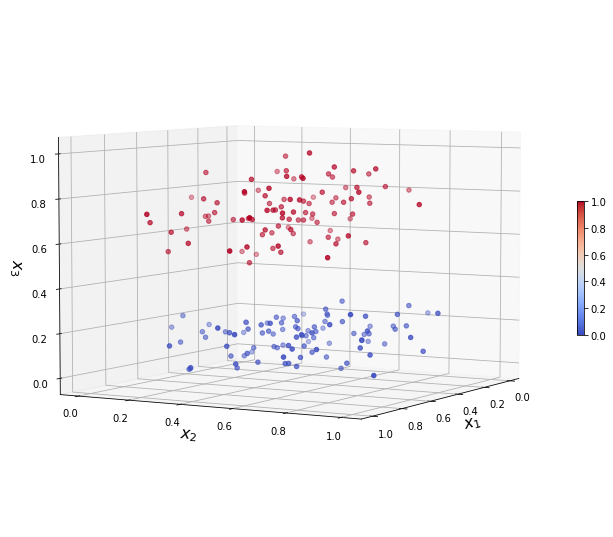

In [50]:
vs.scatter_plot_3d(x_3d, y_3d, elev=5, azim=30)

Os dados acima são visivelmente linearmente separáveis com um hiperplano bidimensional, perfeitos para a visualização. Para ajustar um modelo linear a esse dataset, utiliza-se aqui o classificador `SGDClassifier` do `sklearn`: 


In [51]:
from sklearn.linear_model import SGDClassifier

O objeto importado implementa o algoritmo de Stochastic Gradient Descent ,(<em>descida de gradiente estocástica</em> no portugues). Esse algoritmo se tornou um dos otimizadores mais populares no mercado hoje em dia pela sua velocidade e matemática relativamente simples em comparação a outras classes de algoritmos de otimização, além de ser capaz de encontrar soluções satisfatórias para problemas de ciência de dados. Abaixo uma instancia desse objeto é criada: 




In [52]:
clf = SGDClassifier(
        loss='perceptron',
        max_iter=500,
        verbose=True,
        tol=1e-5,
        random_state=2
    )

 Será explorado nos próximos notebooks tanto o algoritmo de otimização em si, quanto diferentes classificadores que podem ser treinados com esse otimizador, tais como o __perceptron__, que na prática muito de sua matemática já está sendo introduzida aqui por ser um classificador linear simples, e que serve como o uma "porta de entrada" para o extenso mundo das redes neurais artificiais que também serão detalhadas e codificadas mais a frente. Quatro parâmetros do algoritmo foram configurados, porém o que esses parâmetros representam será discutido em detalhes nos próximos notebooks onde é implementado o algoritmo do Stochastic Grandient Descent em python puro com auxilio de pacotes como o numpy.

O parâmetro `loss` já é interessante ser introduzido aqui, pois este determina qual tipo de __função de custo__ será utilizada para contabilizar o erro durante o treinamento. Usualmente, diferentes funções de custo estão associadas a um ou mais classificadores existentes. No caso do objeto acima, ele suporta funções de custo utilizadas por classificadores lineares diferentes, por exemplo:

- Função de custo <em>hinge</em> representa um Linear SVM
- A função <em>perceptron</em> é uma hinge modificada que representa justamente o perceptron
- Já <em>Log</em> é uma função logistica que representa regressões logísticas

Seguindo, treina-se classificador através da função `fit` passando como argumentos posicionais obrigatórios a matrix $X$ de samples de treino e o vetor $Y$ contendo as respectivas respostas para cada sample. Essa nomeclatura será padrão em algoritmos de ML de frameworks de mercado. 

Executando o treinamento:


In [53]:
clf.fit(x_3d, y_3d)

-- Epoch 1
Norm: 30.60, NNZs: 3, Bias: -9.689915, T: 200, Avg. loss: 0.338052
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.23, NNZs: 3, Bias: -9.689915, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 24.81, NNZs: 3, Bias: -9.685646, T: 600, Avg. loss: 0.037091
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 23.78, NNZs: 3, Bias: -9.682485, T: 800, Avg. loss: 0.018602
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 21.40, NNZs: 3, Bias: -9.682485, T: 1000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 20.73, NNZs: 3, Bias: -9.680397, T: 1200, Avg. loss: 0.014779
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 21.51, NNZs: 3, Bias: -9.676389, T: 1400, Avg. loss: 0.014048
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


SGDClassifier(loss='perceptron', max_iter=500, random_state=2, tol=1e-05,
              verbose=True)

O parmâmetro `verbose` passado como verdadeiro na instancia de `clf` permite acompanhar as interações do algoritmo de treino e o erro a cada interação. O algoritmo convergiu para um mínimo e encontrou um hiperplano que separa perfeitamente os dados visto que o custo representado por `loss` foi reduzido a zero a partir da segunda interação, o que significa que o hiperplano encontrado de fato separa perfeitamente ambas as classes. Os atributos `coef_` e `intercept_` do classificador armazenam os coeficientes $w$ e o bias $b$ encontrados para o modelo:

In [54]:
w = clf.coef_.reshape(-1)
b = clf.intercept_

Visualizando os coeficientes do modelo

In [55]:
vs.display_vec(w, 'w')
vs.display_vec(b, 'b')

<br>$w = \begin{bmatrix}-0.79\\0.34\\21.49\end{bmatrix}$<br>

<br>$b = \begin{bmatrix}-9.68\end{bmatrix}$<br>

Com base nesses coeficientes e na equação generalizada do hiperplano, a função que desenha o hiperplano bi-dimensional encontrado é:

$$\normalsize x_3 = 0.036 x_1 - 0.015 x_2 + 0.45$$

Criando a função para desenhar o hiperplano 

In [56]:
H = lambda X: np.array([0.036*x[0] - 0.015*x[1] + 0.45 for x in X])

O plot tridimensional é mais elaborado que o bidimensional. Para visualizar o hiperplano e os dados em um espaço tridimensional, é necessário algumas linhas a mais de código. No caso bidimensional, desenhar o hiperplano siginifica encontrar para cada valor de $x_1$, o valor correspondente de $x_2$ que satisfaz $\left \langle w, x \right \rangle + b = 0$. Já no caso tridimensional, é preciso desenhar uma __grade__ de valores $(x_1, x_2)$, e depois para cada ponto dessa grade, descobrir o respectivo valor de $x_3$ que satisfaz a equação do hiperplano. Abaixo é criada uma maneira bem direta de se gerar esse tipo de plot, tanto que essa solução pode ser encontrada em diversos posts no stackoverflow por exemplo. 

Primeiro cria-se um array de valores para os eixos $x$ e $y$ que são representados pelas variáveis $x_1$ e $x_2$ respectivamente (esses eixos representam comprimento e largura no espaço tridimensional). Como a matriz $X$ foi normalizada com a fórmula de MinMaxScale, todos os valores dispostos nela estão convenientemente entre 0 e 1, então podemos nos basear nestes valores como mínimo e máximo para gerar a grade de valores. A função <a href='https://numpy.org/devdocs/reference/generated/numpy.linspace.html'>np.linspace</a> é bastante útil para gerar esse array:

In [57]:
# Gerando o array de valores
vals = np.linspace(0, 1, 5)

# Visualizando
vs.display_vec(vals)

<br>$\begin{bmatrix}0\\0.25\\0.50\\0.75\\1\end{bmatrix}$<br>

Usando esse array como referência, é possível criar o grid de valores. Para isso, a função <a href='https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html'>np.meshgrid</a> é ideal e igualmente popular, construindo para cada array passado, uma matriz com os respectivos valores daquela variável em um grid.

Abaixo são geradas as coordenadas de $x$ e $y$
    

In [58]:
# Cria uma grade de valores usando np.meshgrid
X_coord, Y_coord = np.meshgrid(vals, vals)

# Exibe as grades
vs.display_matrix(X_coord, label='x_{\\text{coord}}')
vs.display_matrix(Y_coord, label='y_{\\text{coord}}')

<br>$x_{\text{coord}} = \begin{bmatrix}0&0.25&0.50&0.75&1\\0&0.25&0.50&0.75&1\\0&0.25&0.50&0.75&1\\0&0.25&0.50&0.75&1\\0&0.25&0.50&0.75&1\end{bmatrix}$<br><br>

Dimensões da matriz: (5 x 5)



<br>$y_{\text{coord}} = \begin{bmatrix}0&0&0&0&0\\0.25&0.25&0.25&0.25&0.25\\0.50&0.50&0.50&0.50&0.50\\0.75&0.75&0.75&0.75&0.75\\1&1&1&1&1\end{bmatrix}$<br><br>

Dimensões da matriz: (5 x 5)



Utilizando em conjunto a função <a href='https://numpy.org/doc/stable/reference/generated/numpy.c_.html'>numpy.c_</a> e o método <a href='https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html'>numpy.ndarray.ravel</a>, as matrizes acima são transformadas em um dataset no formato `n_samples` x `n_features` de valores $(x,y)$ compatível com a função do hiperplano. No caso, existem 25 linhas pois como existem 5 valores para $x$ e para $y$ ao todo existem $5^2$ combinações de valores. Exibindo apenas as 10 primeiras linhas:

In [59]:
# Cria uma matriz com vetores linha para aplicar a função H
grid_xy = np.c_[X_coord.ravel(), Y_coord.ravel()]

# Exibe a matriz
vs.display_matrix(grid_xy, n_rows=10)

<br>$\begin{bmatrix}0&0\\0.25&0\\0.50&0\\0.75&0\\1&0\\0&0.25\\0.25&0.25\\0.50&0.25\\0.75&0.25\\1&0.25\end{bmatrix}$<br><br>

Dimensões da matriz: (25 x 2)



Passando a grade de valores $(x,y)$ na equação do hiperplano e redimensionando-a para combinar com as coordenadas nos demais eixos, gera-se os respectivos valores da coordenada $z$ (leia-se os valores de $x_3$ que satisfazem o hiperplano) que representa a informação de __altura__ em um plot tridimensional: 

In [60]:
# Gera a terceira coordenada
Z_coord = H(grid_xy).reshape(X_coord.shape)

# Visualiza a matriz
vs.display_matrix(Z_coord, label='z_{\\text{coord}}')

<br>$z_{\text{coord}} = \begin{bmatrix}0.45&0.46&0.47&0.48&0.49\\0.45&0.46&0.46&0.47&0.48\\0.44&0.45&0.46&0.47&0.48\\0.44&0.45&0.46&0.47&0.47\\0.43&0.44&0.45&0.46&0.47\end{bmatrix}$<br><br>

Dimensões da matriz: (5 x 5)



Com as matrizes de coordenadas dos três eixos do plot, é possível gerar a visualização. Primeiro são plotados os samples de treino no espaço de features $\mathbb{R}^3$. Em seguida, para plotar o hiperplano a função <a href='https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=plot_surface#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface'>Axes3D.plot_surface</a> é bastante útil de direta. Ela recebe as matrizes de coordenadas dos eixos $x,y,z$ e desenha a superfície, suportanto outros argumentos como cor e alpha que são utilizadas também. Gerando a visualização do hiperplano em $\mathbb{R}^3$:

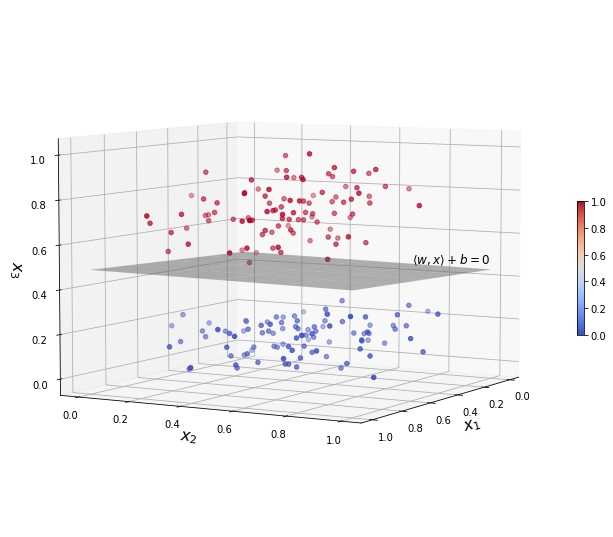

In [61]:
# Plota os dados originais
ax = vs.scatter_plot_3d(x_3d, y_3d, elev=6, azim=30, return_ax_obj=True)
# plota o hiperplano
surf = ax.plot_surface(X_coord, Y_coord, Z_coord, alpha=.5, color='grey')
# anotação no plot
texto = ax.text(0.5, .95, 0.52, '$\\left \\langle w, x \\right \\rangle + b = 0$', fontsize=12)

#### 3.3 Generalizando para maiores espaços dimensionais 

Observando a abordagem para ambos os casos em 2D e 3D, é possível generalizar uma equação para descrever um hiperplano em qualquer espaço dimensional. Supondo que os componentes de um vetor vão de $1$ até $n$, podemos escrever a equação abaixo.

$$\normalsize x_n = \sum_{k=1}^{n - 1}-\frac{w_k}{w_n}x_k + \frac{\tau - b}{w_n}$$

Basicamente, essa equação esta descrevendo __onde__ o hiperplano passa no espaço $\mathbb{R}^n$ dado as coordenadas no espaço $\mathbb{R}^{(n-1)}$, representadas pelos componentes $x_1,\, x_2 \cdots x_{n-1}$ de um vetor $x \in \mathbb{R}^n$ que satisfaz a equação do hiperplano. A função retorna justamente o componente $n$ correspondente deste vetor. Uma maneira vetorizada de computar a equação acima é com o dot product entre vetores reduzidos $w'$ e $x'$, sendo $w'$ e $x'$ os vetores sem a dimensão isolada $n$. $w'$ também é dividido pelo coeficiente dessa dimensão $w_n$ como descrito nas equações acima:</em> 

$$\normalsize x' = \begin{bmatrix} x_1 \\x_2 \\ \vdots \\ x_{n-1} \end{bmatrix}\,\,\,;\,\,\,w' = \begin{bmatrix} w_1 \cdot w_n^{\small -1}\\w_2 \cdot w_n^{\small -1}\\ \vdots \\ w_{n-1} \cdot w_n^{\small -1} \end{bmatrix}$$

Por fim, a equação vetorizada faz o produto escalar entre esses vetores reduzidos e acrescenta o bias também dividido pelo coeficiente $w_n$:

$$\normalsize x_n = - \left \langle w', x' \right \rangle + \frac{\tau - b}{w_n}$$
  
Para testar essa equação, usamos um dataset quadridimensional sintético:

In [62]:
# Carrega o dataset sintético quadridimensional
x_4d, y_4d = datasets_notebooks.Load_dataset_R4()

# Exibe as 5 primeiras linhas
vs.display_matrix(x_4d, n_rows=5, label='X')

<br>$X = \begin{bmatrix}-0.76&1.31&1.78&-1.70\\-0.65&-0.12&-0.10&-1.41\\1.52&-0.96&-0.01&1.07\\0.95&0.74&-0.44&0.67\\1.20&-0.24&-0.61&-0.25\end{bmatrix}$<br><br>

Dimensões da matriz: (100 x 4)



Primeiro treina-se um modelo para ajustar um hiperplano de separação para esses dados. Será novamente utilizado a implementação do algoritmo Stochastic Gradient Descent para classificadores lineares do pacote sklearn. A ideia de utilizar o SGDClassifier algumas vezes é devido ao fato deste ser o algoritmo a ser explorado em notebooks a frente, então essa é uma introdução apropriada. Instanciando o classificador:

In [63]:
# Instancia um classificador com função de custo "hinge", que busca maximizar a margem do hiperplano
clf = SGDClassifier(loss='hinge', random_state=19, verbose=True)

Em seguida o modelo é treinado, e a acurácia para o conjunto de treino é exibido abaixo:

In [64]:
# Treina o modelo
clf.fit(x_4d, y_4d)

# Exibe o score do modelo para o conjunto
print('\n\nAcurácia para o conjunto de treino: %.2f\n' % clf.score(x_4d, y_4d))

-- Epoch 1
Norm: 59.06, NNZs: 4, Bias: 9.808224, T: 100, Avg. loss: 1.213399
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 54.13, NNZs: 4, Bias: 9.808224, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 59.14, NNZs: 4, Bias: 17.669724, T: 300, Avg. loss: 0.283275
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 54.91, NNZs: 4, Bias: 17.669724, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 51.25, NNZs: 4, Bias: 17.669724, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 48.04, NNZs: 4, Bias: 17.669724, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 47.64, NNZs: 4, Bias: 11.674520, T: 700, Avg. loss: 0.012293
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.01 seconds


Acurácia para o conjunto de treino: 1.00



O algoritmo de SGD encontrou um hiperplano de separação ótimo, separando perfeitamente as classes. Agora é possível utilizar os coeficientes encontrados para criar a função do hiperplano, nada diferente do que foi feito nos exemplos anteriores. A função math_functions.hyperplane_function basicamente aplica a equação escrita em __3.2.3__, e para o exemplo atual, ela irá receber um vetor tridimensional e retornar a posição do espaço quadridimensional onde esse vetor atravessa o hiperplano. Abaixo a função é criada:

In [65]:
H = mf.hyperplane_function(w=clf.coef_, b=clf.intercept_)

Tendo essa função, cria-se um grid tridimensional (ou seja, um conjunto de vetores que desenham um espaço 3D) e para cada ponto desse grid, encontrar o respectivo valor de $x_4$
e sendo assim, todos os vetores resultantes devem por definição satisfazer a equação do hiperplano. A função abaixo se encarrega de gerar o grid de valores e já automaticamente compor a quarta dimensão desse grid aplicando a função passada no parâmetro `dim_fun`:

In [66]:
coords = vs.generate_grid_coords(
    n_dims=4, 
    n_vals=5, 
    dim_func=H,
    return_flat=True
)

Exibindo as primeiras linhas da matriz resultante, percebe-se que temos valores padronizados para as 3 primeiras dimensões, e a quarta dimensão foi composta pela função do hiperplano, de forma que cada vetor formado esteja presente no hiperplano

In [67]:
vs.display_matrix(coords, n_rows=10, label='C')

<br>$C = \begin{bmatrix}-1&-1&-1&0.19\\-0.50&-1&-1&0.25\\0&-1&-1&0.31\\0.50&-1&-1&0.37\\1&-1&-1&0.44\\-1&-0.50&-1&0.20\\-0.50&-0.50&-1&0.27\\0&-0.50&-1&0.33\\0.50&-0.50&-1&0.39\\1&-0.50&-1&0.45\end{bmatrix}$<br><br>

Dimensões da matriz: (625 x 4)



Agora finalmente é possível testar os vetores encontrados aplicando a equação do hiperplano. O fato de todos os valores serem vetores armazenados em matrizes é muito conveniente uma vez que calculos matriciais são mais performáticos do que resolver sistemas de equações, e no caso do python, podemos fazer bom uso das propriedades do Numpy que tornam essas computações bem performáticas. No caso, a função linear $z_c$ é a equação do hiperplano em si:

$$\normalsize z_c = \left \langle w, C \right \rangle + b $$

In [68]:
# calcula a função linear para cada um dos vetores
linear_func = np.dot(coords, clf.coef_.T) + clf.intercept_

# Exibe o vetor resultante
vs.display_vec(linear_func[:5], 'z_c')

<br>$z_c = \begin{bmatrix}0\\0\\0\\0\\0\end{bmatrix}$<br>

Aparentemente, para os 5 primeiros vetores encontrados, a função linear retornou 0, o que satisfaz a equação do hiperplano dado que $\tau = 0$. Mas, para fazer um sanity-check, é interessante avaliar os 625 vetores resultantes. Uma sugestão é usar a função `np.allclose` que avalia se dois valores (ou arrays de valores, por ser uma operação <em>element-wise</em> são iguais considerando uma tolerância de diferença (geralmente em muitas casas decimais) para compensar possíveis diferenças de precisão numérica entre os algoritmos que geraram os arrays:

In [69]:
# testa se os valores são iguais ou tendem a zero
if np.allclose(linear_func, np.zeros(625)):
    # Se verdadeiro, printa a seguinte mensagem:
    print('\nTodos os 625 vetores encontrados pertencem ao hiperplano!!\n')
else:
    # Se falso, printa a seguinte mensagem:
    print('\nUm ou mais vetores não pertencem ao hiperplano')


Todos os 625 vetores encontrados pertencem ao hiperplano!!



## 4. Referência bibliográfica

<em>

- An Introduction to Hyperplane Arrangements. Richard P. Stanly

- Unit 9: Hyperplanes. Juan Luis Melero and Eduardo Eyras. Oct 2018

- Linear Algebra Review. (2012). Artificial Intelligence: 6.034, Massachusetts Institute of Technology.

- Decision Surface . A Dictionary of Computing. Encyclopedia.com. 16 Oct. 2020

- Convex Analysis. Section 1 - Affine Sets. Ralph Tyrell Rockafellar   
   